In [1]:
library("dplyr")
library("gridExtra")
library("plotrix")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Opening the file with alpha diversity metric Faiths PD and Observed OTUs
sigtab = read.csv("adiv_pd.txt",sep = "\t", row.names = 1)
sigtab = as.data.frame.matrix(sigtab) 
sigtab$Time = as.factor(sigtab$Time)
sigtab

,PD_whole_tree,chao1,observed_otus,Time,Treat,individual
,<dbl>,<dbl>,<int>,<fct>,<chr>,<int>
570.T0,113.83853,1670.9686,1059,0,Placebo,1
570.T1,145.22928,2131.1174,1498,1,Placebo,1
570.T2,129.30148,1908.4130,1240,2,Placebo,1
570.T3,160.42168,2217.7289,1753,3,Placebo,1
570.T4,27.04752,376.5882,141,4,Placebo,1
570.T5,153.84763,2168.0615,1634,5,Placebo,1
571.T0,115.18985,1523.8408,995,0,Placebo,2
571.T1,138.95754,2042.5000,1388,1,Placebo,2
571.T2,97.26647,1461.7879,761,2,Placebo,2


In [3]:
# Converting the Metric columns to numeric
sigtab$PD_whole_tree = as.numeric(sigtab$PD_whole_tree)
sigtab$observed_otus = as.numeric(sigtab$observed_otus)
sigtab$Time = as.numeric(sigtab$Time)

In [4]:
# Subset the PLacebo and Letrozole groups 
placebo = subset(sigtab, Treat != 'Letrozole')
letrozole = subset(sigtab, Treat != 'Placebo')

## Shapiro-Wilk normality test
### To check the normality of the data


	Shapiro-Wilk normality test

data:  rank(placebo$PD_whole_tree)
W = 0.95568, p-value = 0.06755



	Shapiro-Wilk normality test

data:  rank(placebo$observed_otus)
W = 0.95562, p-value = 0.06714


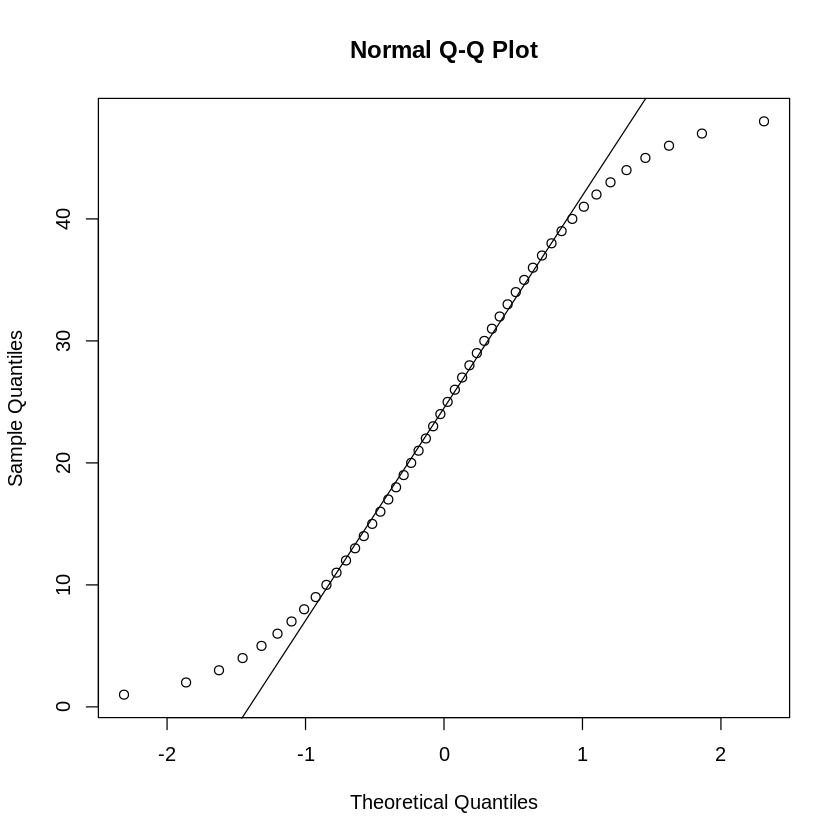


	Shapiro-Wilk normality test

data:  rank(letrozole$PD_whole_tree)
W = 0.95573, p-value = 0.07286


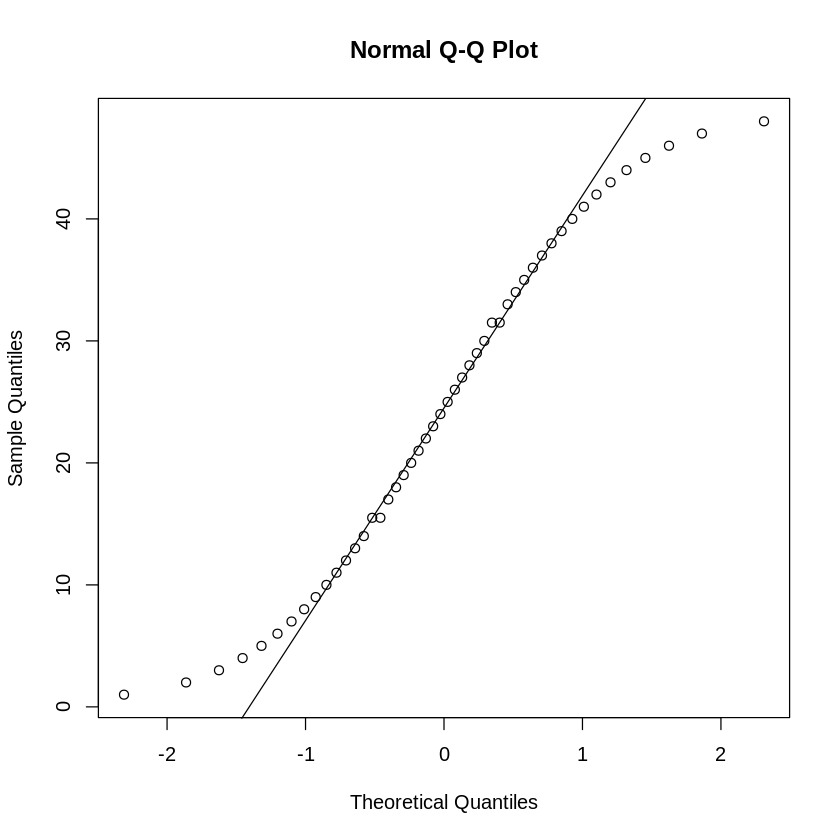


	Shapiro-Wilk normality test

data:  rank(letrozole$observed_otus)
W = 0.95537, p-value = 0.07048


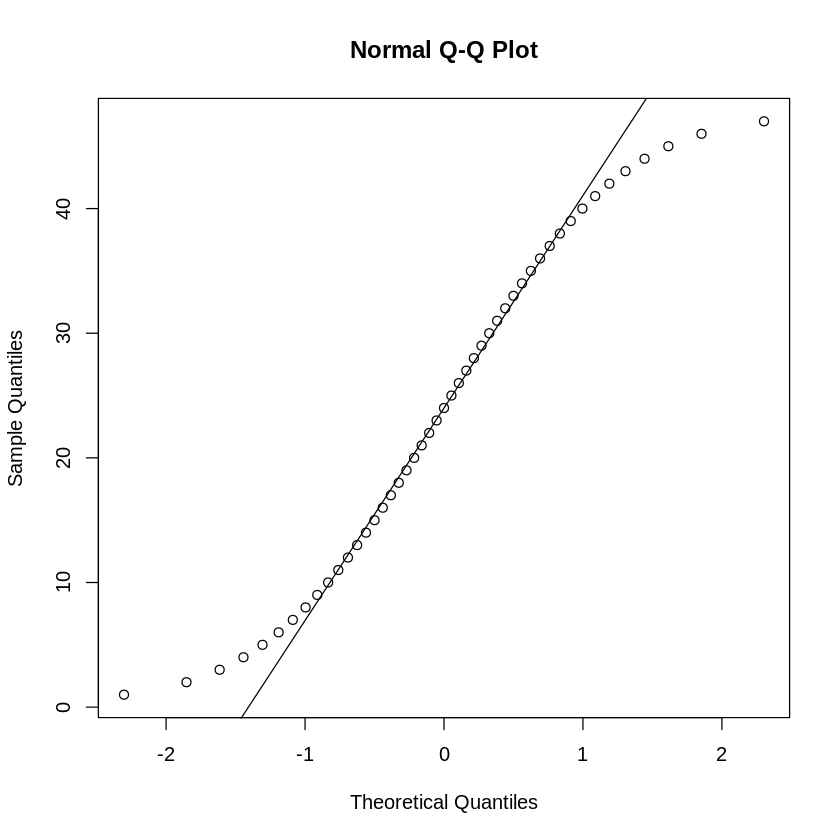

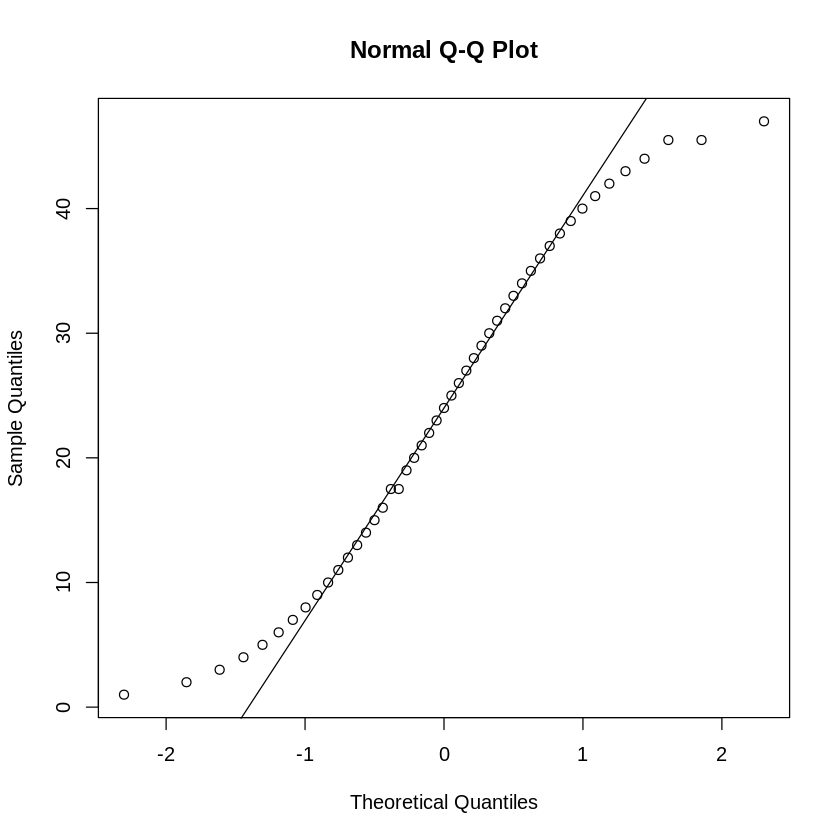

In [9]:
shapiro.test(rank(placebo$PD_whole_tree)) #reject null hypothesis that data is normally distributed
qqnorm(rank(placebo$PD_whole_tree))
qqline(rank(placebo$PD_whole_tree))

shapiro.test(rank(placebo$observed_otus)) #reject null hypothesis that data is normally distributed
qqnorm(rank(placebo$observed_otus))
qqline(rank(placebo$observed_otus))

shapiro.test(rank(letrozole$PD_whole_tree)) #reject null hypothesis that data is normally distributed
qqnorm(rank(letrozole$PD_whole_tree))
qqline(rank(letrozole$PD_whole_tree))

shapiro.test(rank(letrozole$observed_otus)) #reject null hypothesis that data is normally distributed
qqnorm(rank(letrozole$observed_otus))
qqline(rank(letrozole$observed_otus))

## Pearsons Correlations

In [10]:
print("Faith's PD for placebo")
print("#p value is 0.0004874  #r value is 0.4842651")
cor.test(x = rank(placebo$PD_whole_tree), y = placebo$Time, method="pearson")

print("Faith's PD for letrozole")
print("#p value is 0.4075 #r value is 0.1233569")
cor.test(x = rank(letrozole$PD_whole_tree), y = letrozole$Time, method="pearson")

print("Observed Otus for placebo")
print("#p value is 0.001  #r value is 0.446127")
cor.test(x = rank(placebo$observed_otus), y = placebo$Time, method="pearson")

print("Observed Otus for letrozole")
print("#p value is 0.033 #r value is 0.3079911")
cor.test(x = rank(letrozole$observed_otus), y = letrozole$Time, method="pearson")

[1] "Faith's PD for placebo"
[1] "#p value is 0.0004874  #r value is 0.4842651"



	Pearson's product-moment correlation

data:  rank(placebo$PD_whole_tree) and placebo$Time
t = 1.1697, df = 46, p-value = 0.2482
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1199802  0.4331660
sample estimates:
      cor 
0.1699481 


[1] "Faith's PD for letrozole"
[1] "#p value is 0.4075 #r value is 0.1233569"



	Pearson's product-moment correlation

data:  rank(letrozole$PD_whole_tree) and letrozole$Time
t = 2.2933, df = 45, p-value = 0.02656
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.04003111 0.55874309
sample estimates:
      cor 
0.3234793 


[1] "Observed Otus for placebo"
[1] "#p value is 0.001  #r value is 0.446127"



	Pearson's product-moment correlation

data:  rank(placebo$observed_otus) and placebo$Time
t = 1.2417, df = 46, p-value = 0.2206
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1096616  0.4416220
sample estimates:
      cor 
0.1800843 


[1] "Observed Otus for letrozole"
[1] "#p value is 0.033 #r value is 0.3079911"



	Pearson's product-moment correlation

data:  rank(letrozole$observed_otus) and letrozole$Time
t = 1.6996, df = 45, p-value = 0.09611
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04471887  0.49766878
sample estimates:
      cor 
0.2456019 


In [6]:
##Not normalized
print("Faith's PD for placebo")
print("#p value is 0.0004874  #r value is 0.4842651")
cor.test(x = placebo$PD_whole_tree, y = placebo$Time, method="pearson")

print("Faith's PD for letrozole")
print("#p value is 0.4075 #r value is 0.1233569")
cor.test(x = letrozole$PD_whole_tree, y = letrozole$Time, method="pearson")

print("Observed Otus for placebo")
print("#p value is 0.001  #r value is 0.446127")
cor.test(x = placebo$observed_otus, y = placebo$Time, method="pearson")

print("Observed Otus for letrozole")
print("#p value is 0.033 #r value is 0.3079911")
cor.test(x = letrozole$observed_otus, y = letrozole$Time, method="pearson")

[1] "Faith's PD for placebo"
[1] "#p value is 0.0004874  #r value is 0.4842651"



	Pearson's product-moment correlation

data:  placebo$PD_whole_tree and placebo$Time
t = 0.63734, df = 46, p-value = 0.5271
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1957809  0.3679127
sample estimates:
      cor 
0.0935583 


[1] "Faith's PD for letrozole"
[1] "#p value is 0.4075 #r value is 0.1233569"



	Pearson's product-moment correlation

data:  letrozole$PD_whole_tree and letrozole$Time
t = 2.2013, df = 45, p-value = 0.03289
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02704509 0.54973612
sample estimates:
      cor 
0.3117904 


[1] "Observed Otus for placebo"
[1] "#p value is 0.001  #r value is 0.446127"



	Pearson's product-moment correlation

data:  placebo$observed_otus and placebo$Time
t = 0.82833, df = 46, p-value = 0.4118
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1687165  0.3918663
sample estimates:
      cor 
0.1212297 


[1] "Observed Otus for letrozole"
[1] "#p value is 0.033 #r value is 0.3079911"



	Pearson's product-moment correlation

data:  letrozole$observed_otus and letrozole$Time
t = 1.9245, df = 45, p-value = 0.06063
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01238373  0.52162313
sample estimates:
      cor 
0.2757638 


In [12]:
print("#For faith's PD placebo")
placebo_aov_PD <- aov(rank(placebo$PD_whole_tree) ~ factor(placebo$Time) + Error(placebo$individual),data=placebo)
summary(placebo_aov_PD) #P = 0.00369

print("#For observed Otu placebo")
placebo_aov_otu <- aov(rank(placebo$observed_otus) ~ factor(placebo$Time) + Error(placebo$individual),data=placebo)
summary(placebo_aov_otu) #P = 0.00135 **

print("#For faith's PD letrozole")
letrozole_aov_PD <- aov(rank(letrozole$PD_whole_tree) ~ factor(letrozole$Time) + Error(letrozole$individual),data=letrozole)
summary(letrozole_aov_PD) #P = 0.411

print("#For observed Otu letrozole")
letrozole_aov_otu <- aov(rank(letrozole$observed_otus) ~ factor(letrozole$Time) + Error(letrozole$individual),data=letrozole)
summary(letrozole_aov_otu) #P = 0.126

[1] "#For faith's PD placebo"



Error: placebo$individual
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1  461.4   461.4               

Error: Within
                     Df Sum Sq Mean Sq F value  Pr(>F)   
factor(placebo$Time)  5   3070   613.9    4.43 0.00256 **
Residuals            41   5681   138.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "#For observed Otu placebo"



Error: placebo$individual
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1  271.4   271.4               

Error: Within
                     Df Sum Sq Mean Sq F value  Pr(>F)   
factor(placebo$Time)  5   3139   627.9   4.438 0.00254 **
Residuals            41   5800   141.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "#For faith's PD letrozole"



Error: letrozole$individual
                       Df Sum Sq Mean Sq
factor(letrozole$Time)  1  674.4   674.4

Error: Within
                       Df Sum Sq Mean Sq F value  Pr(>F)   
factor(letrozole$Time)  5   2913   582.6   4.605 0.00206 **
Residuals              40   5060   126.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "#For observed Otu letrozole"



Error: letrozole$individual
                       Df Sum Sq Mean Sq
factor(letrozole$Time)  1  971.6   971.6

Error: Within
                       Df Sum Sq Mean Sq F value  Pr(>F)   
factor(letrozole$Time)  5   2870   574.0   4.779 0.00162 **
Residuals              40   4805   120.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Plotting our models

In [15]:
e <- ggplot(data = placebo, aes(x = Time, y = PD_whole_tree, ymin = 50, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 10, ymax = 50), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 30 ,label = "LM: r = 0.169\np = 0.248\n RM-ANOVA\n p= 0.002") +
    theme_classic() +
    xlab("Week") + ylab("Diveristy (Faith's PD)") + ggtitle("Placebo")

f <- ggplot(data = letrozole, aes(x = Time, y = PD_whole_tree, ymin = 50, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 10, ymax = 50), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 30 ,label = "LM: r = 0.320\np = 0.0.026\n RM-ANOVA\n p= 0.002") +
    theme_classic() +
    xlab("Week") + ylab("Diveristy (Faith's PD)") + ggtitle("Letrozole")

g <- ggplot(data = placebo, aes(x = Time, y = observed_otus, ymin = 80, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 60, ymax = 500), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 272.5 ,label = "LM: r = 0.180\np = 0.220\n RM-ANOVA\n p= 0.002") +
    theme_classic() +
    xlab("Week") + ylab("Observed OTUs") + ggtitle("Placebo")

h <- ggplot(data = letrozole, aes(x = Time, y = observed_otus, ymin = 80, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 60, ymax = 500), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 272.5 ,label = "LM: r = 0.245\np = 0.096\n RM-ANOVA\n p= 0.001") +
    theme_classic() +
    xlab("Week") + ylab("Observed OTUs") + ggtitle("Letrozole")

In [16]:
pdf("pdf_alpha_new.pdf", width = 8, height = 8) # Open a new pdf file
grid.arrange(e, f, g, h , nrow = 2)
dev.off() # Close the file

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

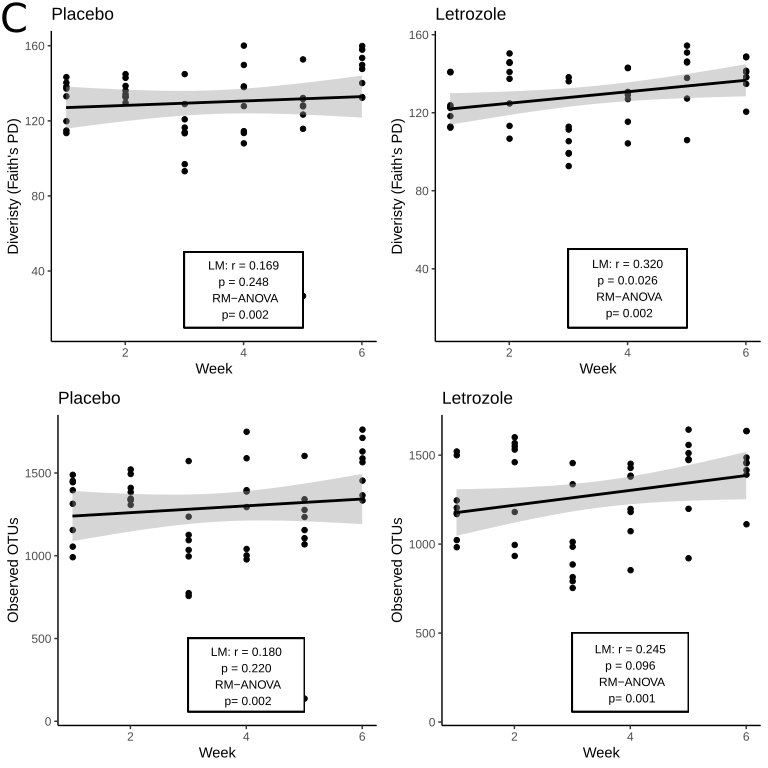